In [2]:
import pandas as pd
import pandas as pd

# Lê arquivos csv
movieRatings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

# Renomeia cabeçalhos
movieRatings.columns = ["usuarioId", "filmeId", "nota", "dataHora"]
movies.columns = ["filmeId", "titulo", "generos"]

# Adquire todas as notas e realiza uma média
movieRatings["nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

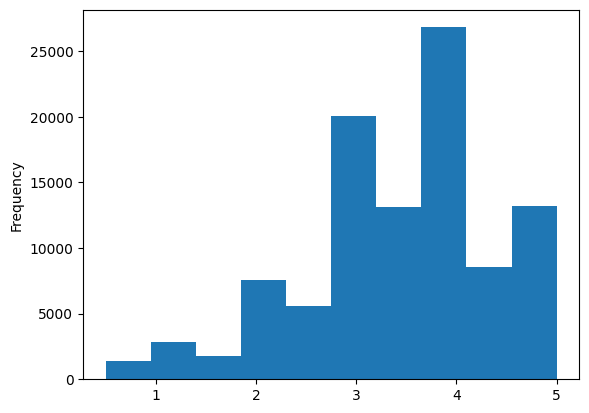

In [3]:
# Matplotlib para realizar visualizações gráficas
movieRatings.nota.plot(kind="hist")

3.5
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64


<Axes: >

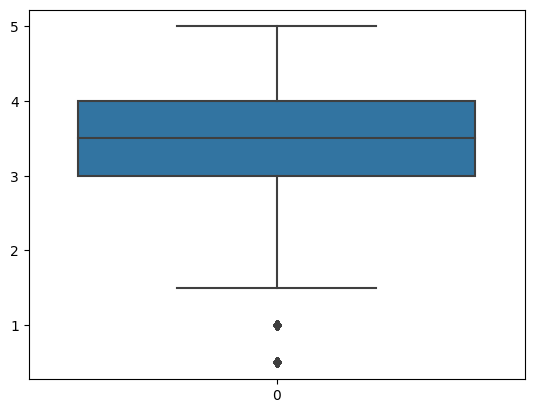

In [4]:
import seaborn as sb

# A mediana pega o intervalo onde se divide as notas mais baixas com as notas mais altas, ou seja, adquire o intervalo [...]
# [...] dos valores mais votados dos filmes
print(movieRatings.nota.median())
print(movieRatings.nota.describe())

# A função boxplot realiza mesma coisa mas de forma visual
sb.boxplot(movieRatings.nota)

In [5]:
movies.head()

# Adquirindo média de todos os filmes com o Id específico
filmeId = 4
movieRatings.query(f'filmeId=={filmeId}').nota.mean()

2.357142857142857

<Axes: ylabel='Frequency'>

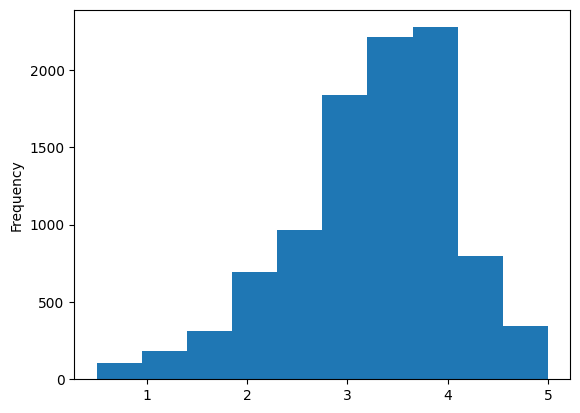

In [6]:
# Médias por filme
meanMovies = movieRatings.groupby("filmeId").nota.mean()
meanMovies.plot(kind="hist")

In [17]:
# Split de generos para realizar consultas a partir de um array de gêneros
movies['generosSplit'] = movies['generos'].str.split(pat='|')
movies[['generos', 'generosSplit']]

,generos,generosSplit
0,Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,Comedy|Romance,"[Comedy, Romance]"
3,Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,Comedy,[Comedy]
...,...,...
9737,Action|Animation|Comedy|Fantasy,"[Action, Animation, Comedy, Fantasy]"
9738,Animation|Comedy|Fantasy,"[Animation, Comedy, Fantasy]"
9739,Drama,[Drama]
9740,Action|Animation,"[Action, Animation]"


In [54]:
# Retorna todos os filmes do gênero específico
genero = "Romance"

# Where em pandas funciona de forma diferente da cláusula de mesmo nome no SQL
# Funciona como If/If Else e substitui o registro onde a condição seja False por outro valor, no caso, NaN
mf = movies.where(movies.generos.str.contains(pat=genero)) # Duas formas de retornar o resultado
mf = movies.where(movies.generosSplit.apply(lambda x: genero in x))

# Remove todas as linhas com valores NaN
mf.dropna()

,filmeId,titulo,generos,generosSplit
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
10,11.0,"American President, The (1995)",Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
13,14.0,Nixon (1995),Drama,[Drama]
15,16.0,Casino (1995),Crime|Drama,"[Crime, Drama]"
16,17.0,Sense and Sensibility (1995),Drama|Romance,"[Drama, Romance]"
...,...,...,...,...
9727,190213.0,John From (2015),Drama,[Drama]
9728,190215.0,Liquid Truth (2017),Drama,[Drama]
9733,193567.0,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama,"[Animation, Drama]"
9734,193571.0,Silver Spoon (2014),Comedy|Drama,"[Comedy, Drama]"
